# Problem statement¶

Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 
For Movies

In [3]:
#Basic Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from mlxtend.frequent_patterns import apriori              # to create frequent itemset
from mlxtend.frequent_patterns import association_rules    #Get the Association rules
from mlxtend.preprocessing import TransactionEncoder      #to convert transaction to 1 and 0 array

In [173]:
#for warnings 
import warnings
warnings.filterwarnings('ignore')

In [5]:
#getting movie data into data frame 
movie_df=pd.read_csv('my_movies.csv')

In [6]:
#checking how many records are there
movie_df.shape

(10, 15)

In [8]:
movie_df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [18]:
movie_df_=movie_df.iloc[:,5:]
movie_df_

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [49]:
movie_df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


### Getting more idea about frequency of the movies 

In [20]:
cols=movie_df_.columns
freq_1=[]
for i in cols:
        a=movie_df_[i].value_counts()
        freq_1.append(a[1])
freq_data=pd.DataFrame(freq_1,columns=['freq'])
freq_data['categ']=cols

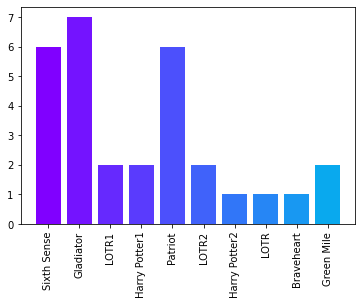

In [21]:
colors=plt.cm.rainbow(np.linspace(0,1,40))
plt.bar(freq_data['categ'],height=freq_data['freq'],color=colors)
plt.xticks(rotation=90)
plt.show()

In [148]:
## Applying apriori algorith with different support ranging from 0.1 t0 0.9

In [35]:
sup_range=np.linspace(0.1,1,10) # craeted range bet 0.1 to .9 with the help of linspace function
no_rules=[]

frequent_itemsets1=pd.DataFrame()
for i in sup_range:
    d=[]
    frequent_itemsets=pd.DataFrame()
    frequent_itemsets=apriori(movie_df_,min_support=i,use_colnames=True)
    frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x:len(x))
    c=list(frequent_itemsets.shape)
    for j in range(0,c[0]):
                d.append(i)
    frequent_itemsets['minsupport']=d 
    frequent_itemsets1=frequent_itemsets1.append(frequent_itemsets,ignore_index=False)
list_set=[]
s=frequent_itemsets1.shape

frequent_itemsets1

,support,itemsets,length,minsupport
0,0.6,(Sixth Sense),1,0.1
1,0.7,(Gladiator),1,0.1
2,0.2,(LOTR1),1,0.1
3,0.2,(Harry Potter1),1,0.1
4,0.6,(Patriot),1,0.1
...,...,...,...,...
4,0.6,"(Gladiator, Patriot)",2,0.5
0,0.6,(Sixth Sense),1,0.6
1,0.7,(Gladiator),1,0.6
2,0.6,(Patriot),1,0.6


In [122]:
frequent_itemsets1['minsupport'].value_counts()

0.1    53
0.2    13
0.3     7
0.4     7
0.5     5
0.6     4
Name: minsupport, dtype: int64

In [193]:
data_1=frequent_itemsets1[frequent_itemsets1['minsupport']==0.1]
data_1

,support,itemsets,length,minsupport
0,0.6,(Sixth Sense),1,0.1
1,0.7,(Gladiator),1,0.1
2,0.2,(LOTR1),1,0.1
3,0.2,(Harry Potter1),1,0.1
4,0.6,(Patriot),1,0.1
5,0.2,(LOTR2),1,0.1
6,0.1,(Harry Potter2),1,0.1
7,0.1,(LOTR),1,0.1
8,0.1,(Braveheart),1,0.1
9,0.2,(Green Mile),1,0.1


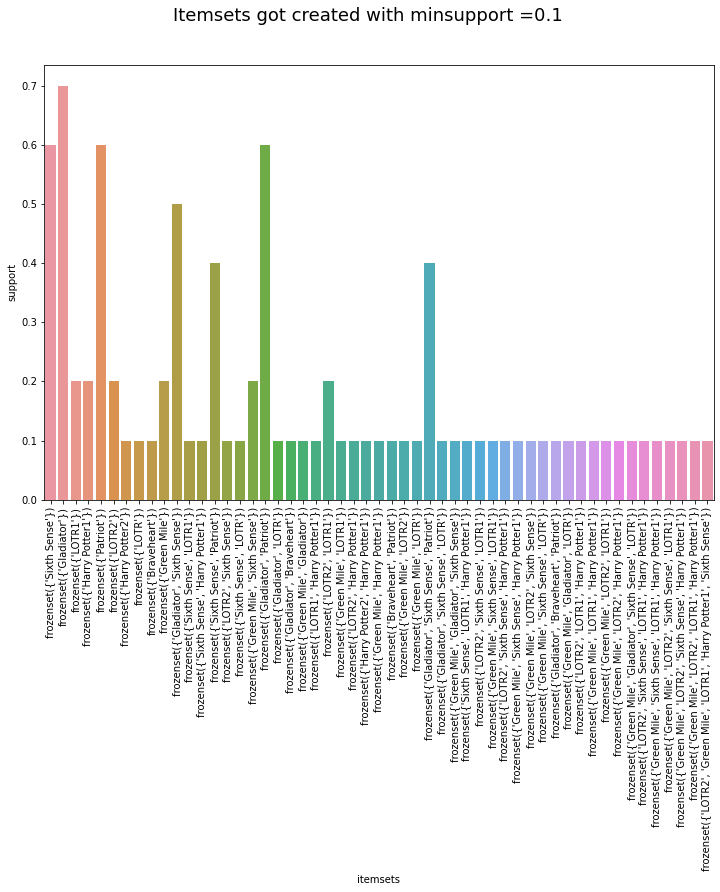

In [220]:
plt.figure(figsize=(12,8))
plt.suptitle("Itemsets got created with minsupport =0.1",fontsize=18)
sns.barplot(data_1.itemsets,data_1.support)
plt.xticks(rotation=90)
plt.show()

#### With the 0.1 support we got 5 item which are frequent 

In [135]:
data_2=frequent_itemsets1[frequent_itemsets1['minsupport']==0.2]
data_2

,support,itemsets,length,minsupport
0,0.6,(Sixth Sense),1,0.2
1,0.7,(Gladiator),1,0.2
2,0.2,(LOTR1),1,0.2
3,0.2,(Harry Potter1),1,0.2
4,0.6,(Patriot),1,0.2
5,0.2,(LOTR2),1,0.2
6,0.2,(Green Mile),1,0.2
7,0.5,"(Gladiator, Sixth Sense)",2,0.2
8,0.4,"(Sixth Sense, Patriot)",2,0.2
9,0.2,"(Green Mile, Sixth Sense)",2,0.2


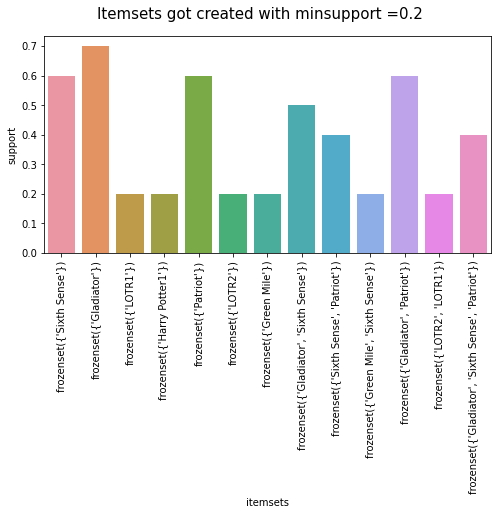

In [221]:
plt.figure(figsize=(8,4))
sns.barplot(data_2.itemsets,data_2.support)


plt.xticks(rotation=90)
plt.suptitle("Itemsets got created with minsupport =0.2",fontsize=15)

plt.show()

### With 0.2 Support we got 3 frequent item

In [120]:
frequent_itemsets1[frequent_itemsets1['minsupport']==0.3]

,support,itemsets,length,minsupport


### we dont have any itemset with minsupport 0.3

In [138]:
data_4=frequent_itemsets1[frequent_itemsets1['minsupport']==0.4]
data_4

,support,itemsets,length,minsupport
0,0.6,(Sixth Sense),1,0.4
1,0.7,(Gladiator),1,0.4
2,0.6,(Patriot),1,0.4
3,0.5,"(Gladiator, Sixth Sense)",2,0.4
4,0.4,"(Sixth Sense, Patriot)",2,0.4
5,0.6,"(Gladiator, Patriot)",2,0.4
6,0.4,"(Gladiator, Sixth Sense, Patriot)",3,0.4


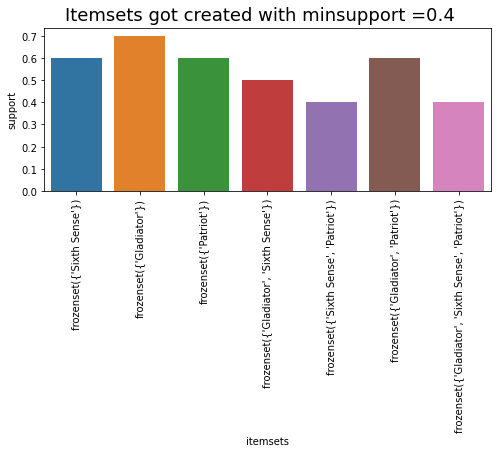

In [222]:
plt.figure(figsize=(8,3))
sns.barplot(data_4.itemsets,data_4.support)
plt.xticks(rotation=90)
plt.suptitle("Itemsets got created with minsupport =0.4",fontsize=18)
plt.show()

##  With 0.4 Support we got 3 frequent item

In [139]:
data_5=frequent_itemsets1[frequent_itemsets1['minsupport']==0.5]
data_5

,support,itemsets,length,minsupport
0,0.6,(Sixth Sense),1,0.5
1,0.7,(Gladiator),1,0.5
2,0.6,(Patriot),1,0.5
3,0.5,"(Gladiator, Sixth Sense)",2,0.5
4,0.6,"(Gladiator, Patriot)",2,0.5


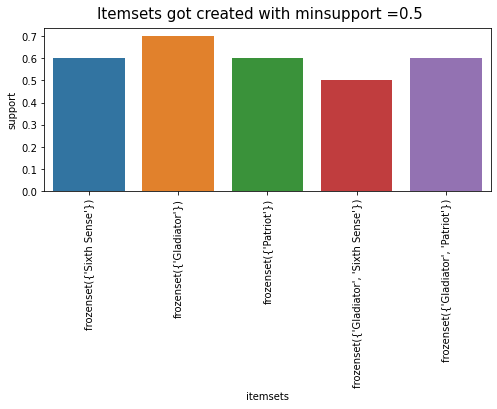

In [223]:
plt.figure(figsize=(8,3))
sns.barplot(data_5.itemsets,data_5.support)
plt.xticks(rotation=90)
plt.suptitle("Itemsets got created with minsupport =0.5",fontsize=15)
plt.show()

## min support 0.5 gives us 2 item which are frequent

In [129]:
data_6=frequent_itemsets1[frequent_itemsets1['minsupport']==0.6]
data_6

,support,itemsets,length,minsupport
0,0.6,(Sixth Sense),1,0.6
1,0.7,(Gladiator),1,0.6
2,0.6,(Patriot),1,0.6
3,0.6,"(Gladiator, Patriot)",2,0.6


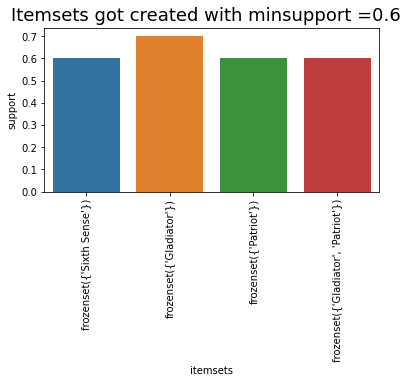

In [224]:
plt.figure(figsize=(6,3))
sns.barplot(data_6.itemsets,data_6.support)
plt.xticks(rotation=90)
plt.suptitle("Itemsets got created with minsupport =0.6",fontsize=18)
plt.show()

## min support 0.6 gives us 2 item which are frequent

## Finding Association rule with min_threashold 0.8 with min conf=0.5

In [142]:
rules_conf = association_rules(data_6,metric='confidence' ,min_threshold=0.8)
rules_conf.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


In [151]:
rel=rules_conf[rules_conf.lift>1]
rel

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


In [152]:
p1=rel.pivot('antecedents','consequents','lift')
p1.head()

consequents,(Patriot),(Gladiator)
antecedents,,
(Gladiator),1.428571,NaN
(Patriot),NaN,1.428571


(array([0.5, 1.5]),
 [Text(0.5, 0, "frozenset({'Patriot'})"),
  Text(1.5, 0, "frozenset({'Gladiator'})")])

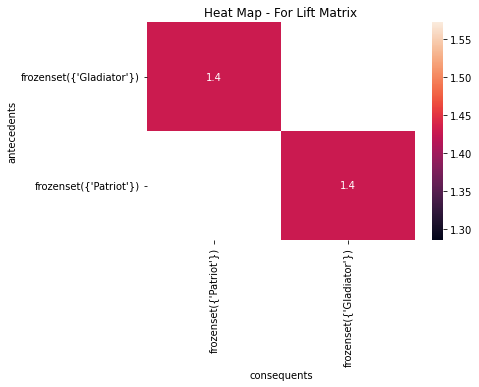

In [153]:
sns.heatmap(p1,annot = True)
plt.title('Heat Map - For Lift Matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

## We get relation of people who watch gladiator also watch patriot

## Finding Association rule with min_threashold 0.8 with min conf=0.1

In [164]:
rules_conf1 = association_rules(data_4,metric='confidence' ,min_threshold=0.8)
rules_conf1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


In [165]:
# getting only those recoreds which has a lift more than 1

In [166]:
rel1=rules_conf1[rules_conf1.lift>1]
rel1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


In [ ]:
#creating a pivote table 

In [159]:
p2=rel1.pivot('antecedents','consequents','lift')
p2.head()

consequents,(Gladiator),(Patriot)
antecedents,,
(Sixth Sense),1.190476,NaN
(Gladiator),NaN,1.428571
(Patriot),1.428571,NaN
"(Gladiator, Sixth Sense)",NaN,1.333333
"(Sixth Sense, Patriot)",1.428571,NaN


In [ ]:
## visualizing the table

(array([0.5, 1.5]),
 [Text(0.5, 0, "frozenset({'Gladiator'})"),
  Text(1.5, 0, "frozenset({'Patriot'})")])

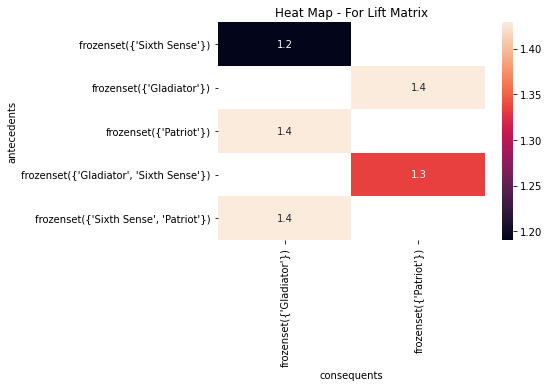

In [160]:
sns.heatmap(p2,annot = True)
plt.title('Heat Map - For Lift Matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

## Those who watch Gladiator and patriot also watch Sixth sence